In [1]:
import pandas as pd
import numpy as np

In [105]:
############ Data Preprocessing ############
# Importing Training Set

df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-28,10203.426760,10279.366210,9716.656250,9754.422852,9754.422852,1.760379e+10
1,2019-08-29,9756.786133,9756.786133,9421.629883,9510.200195,9510.200195,1.704588e+10
2,2019-08-30,9514.844727,9656.124023,9428.302734,9598.173828,9598.173828,1.359526e+10
3,2019-08-31,9597.539063,9673.220703,9531.799805,9630.664063,9630.664063,1.145481e+10
4,2019-09-01,9630.592773,9796.755859,9582.944336,9757.970703,9757.970703,1.144536e+10


In [106]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,8805.001509,8967.537686,8637.412731,8808.691697,8808.691697,2.737569e+10
std,1425.608328,1417.120718,1437.205411,1431.618906,1431.618906,1.155920e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,1.144536e+10
25%,7652.531738,7800.332641,7517.305298,7652.029297,7652.029297,1.791712e+10
50%,8934.328613,9167.738282,8799.275390,8935.923340,8935.923340,2.401870e+10
75%,9641.094482,9780.087891,9469.027832,9644.885009,9644.885009,3.519219e+10
max,12251.895510,12359.056640,11954.525390,12254.402340,12254.402340,7.415677e+10


In [107]:
#see how many data are losted
print("nan data for column Open", df['Open'].isnull().sum())
print("nan data for column Close", df['Close'].isnull().sum())

nan data for column Open 1
nan data for column Close 1


In [131]:
#so because the nan is only 1 data, we drop that.
##If they was more, we should change the method
df.dropna(axis=0, inplace=True)

In [132]:
print("nan data for column Open", df['Open'].isnull().sum())
print("nan data for column Close", df['Close'].isnull().sum())

nan data for column Open 0
nan data for column Close 0


In [133]:
##Defining Features
X = df[["Adj Close","Volume"]]
y = df["Open"]
#from sklearn.preprocessing import MinMaxScaler
##Data Normalization (Min-Max scaling)
#X = (X-X.min())/(X.max()-X.min())
#y = (y-y.min())/(y.max()-y.min())

#dataset = df[["Adj Close","Volume", "Open"]].values
#scaler  = MinMaxScaler(feature_range=(0, 1))
#dataset_scaled = scaler.fit_transform(dataset)
maximum= X.max()
maximumout= y.max()

X = X/X.max()
y = y/y.max()

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)
x_train.shape

#Reshaping for Keras [reshape into 3 dimensions, [batch_size, timesteps, feature]
#we need to reshape for using keras LSTM, LSTM needs 3 dimension data as input,
#and DataFrame is only 2-dim, so we should change it to a numpy array using df.values

x_train= x_train.values.reshape(x_train.shape[0],1 ,2) 

In [135]:
type(x_train)
np.shape(x_train)

(292, 1, 2)

In [136]:
############ Buiding RNN Model ########
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Initializing the RNN
model= Sequential()

# Adding LSTM layer and Drop out Regularization
model.add(LSTM(units=32, input_shape = (x_train.shape[1], x_train.shape[2]),activation = 'relu')) 
#model.add(Dropout(.1))

# Output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [137]:

# Train :)
history = model.fit(x_train, y_train, epochs = 20, batch_size = 8)

Epoch 1/20
37/37 [==============================] - 0s 1ms/step - loss: 0.4303
Epoch 2/20
37/37 [==============================] - 0s 1ms/step - loss: 0.2556
Epoch 3/20
37/37 [==============================] - 0s 1ms/step - loss: 0.1117
Epoch 4/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0314
Epoch 5/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 6/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 9/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 10/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 11/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 12/20
37/37 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 13/20
37/37 [==============================

In [138]:
############ Save & load Trained Model ############
# Save Trained Model
model.save('TICKER-RNN.h5')

In [139]:
############ Predict & Test the Model ############
real_price = x_test.values
real_price=real_price.reshape(x_test.shape[0],1 ,2)
predicted_output = model.predict(real_price)

real_price= real_price.reshape(x_test.shape[0],2)
#dataset_test['Real']=real_price
dataset_test = pd.DataFrame(predicted_output)
dataset_test['Real_Data1']=real_price[:,0]
dataset_test['Real_Data2']=real_price[:,1]
dataset_test

,0,Real_Data1,Real_Data2
0,0.631370,0.591064,0.255231
1,0.732606,0.756462,0.614349
2,0.701430,0.680291,0.195972
3,0.790185,0.793945,0.204228
4,0.722304,0.710610,0.257357
...,...,...,...
69,0.750005,0.758382,0.417145
70,0.743571,0.738961,0.277627
71,0.804713,0.841503,0.584414
72,0.627115,0.589079,0.305216


In [140]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predicted_output, y_test)
mse

0.0006734427213352122

In [125]:
df = df.reset_index()

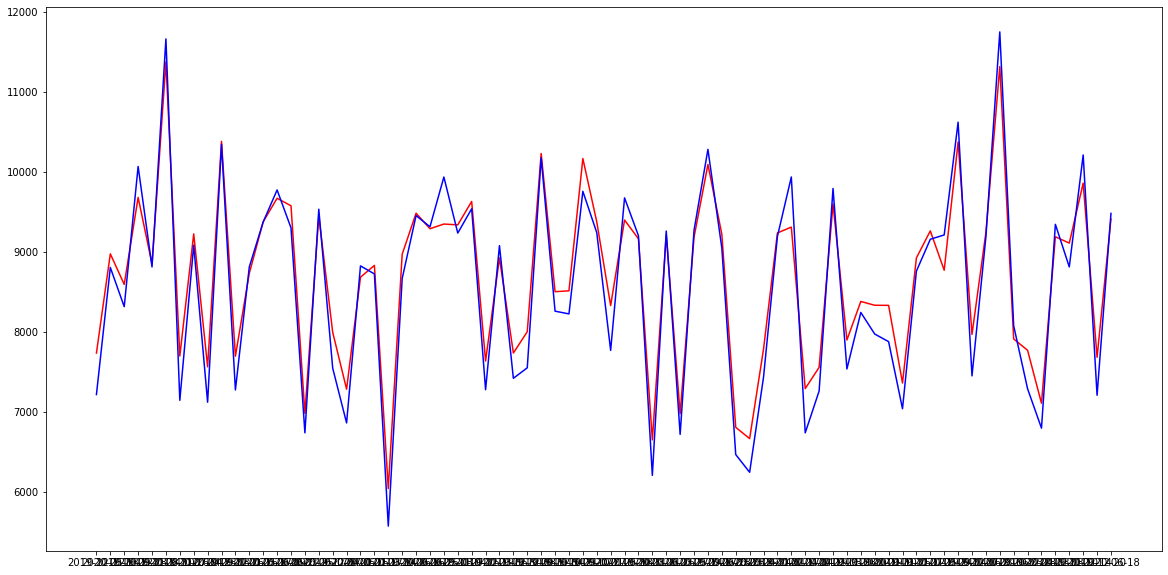

In [141]:
import matplotlib.pyplot as plt


##this is the de-normalization
yhat_train = model.predict(x_train)
yhat_test = predicted_output*maximumout
y_test= y_test*maximumout
#k=y_test.index
#time_test= pd.Series(index=k)
#time_test= df['Date'].where[df['Open']==y_test[:]]
#for i in k:
#    time_test[i]=df['Date'].where(df['Open']==y_test[i])
time_test = df.loc[y_test.index]['Date']
plt.figure(figsize = (20,10))
plt.plot(time_test, yhat_test, 'red')
plt.plot(time_test, y_test, 'blue')